In [1]:
%cd /Users/monica_air/Documents/GitHub/Sign_recognition/py

/Users/monica_air/Documents/GitHub/Sign_recognition/py


In [2]:
from machine_learning import *
from basic_preprocessing import *

### Data load

In [3]:
data_path = '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/'

In [4]:
a=   get_file_list(data_path)
a=a[1:]
a

['/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/handle',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/up',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/wet']

In [5]:
categories = ['fragile', 'handle', 'up', 'wet']

In [6]:
def data_for_ml (categories, data_path, num):
    data = []
    img_path=[]
    

    for category in categories:
        file_path = os.path.join(data_path, category)
        print(file_path)
        label = categories.index(category)

        for img in os.listdir(file_path):
            imgpath = os.path.join(file_path, img)
            img_path.append(imgpath)

            try: 
                pet_img = cv2.imread(imgpath, cv2.IMREAD_COLOR)
                pet_img = cv2.cvtColor(pet_img, cv2.COLOR_BGR2RGB)
                pet_img = cv2.resize(pet_img, (num, num))

                images = np.array(pet_img).flatten()

                data.append([images, label])

            except Exception as e:
                pass

    print('data수: ', len(data))
    return data, img_path, label


In [7]:
data, img_path, label = data_for_ml(categories, data_path, 200)

/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/handle
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/up
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/wet
data수:  613


In [8]:
features, labels = feature_label_maker(data)

features:  613
features ex:  [238 238 238 ... 240 240 240]
feature shape:  (120000,)
-----------------------------
labels:  613
labels ex:  0
labels shape:  (120000,)


In [9]:
for num, i in enumerate (img_path):
    i = i.split('/')[-1]
#     print(i)
    if i =='.DS_Store':
        print(num)

37
257
365
523


In [10]:
img_path[37]

'/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile/.DS_Store'

In [11]:
del img_path[37]
del img_path[257]
del img_path[365]
del img_path[523]

In [12]:
print(len(img_path))
print(len(labels))
print(len(features))

613
613
613


In [13]:
feature_names = []
for num, i in enumerate (img_path):
    i = i.split('/')[-1]
    feature_names.append(i)
    
feature_names[2]

'fragile_resized_77.jpg'

In [14]:
img_infos = pd.DataFrame({'feature_names':feature_names, 'label':labels})

In [15]:
cd /Users/monica_air/Documents/Sign recognition

/Users/monica_air/Documents/Sign recognition


In [16]:
img_infos.to_csv('[0921]sign_recognition.csv')

In [17]:
for i in categories:
    img_paths = data_path+i
    print(i, count_img(img_paths))

이미지 수 247
fragile None
이미지 수 96
handle None
이미지 수 159
up None
이미지 수 115
wet None


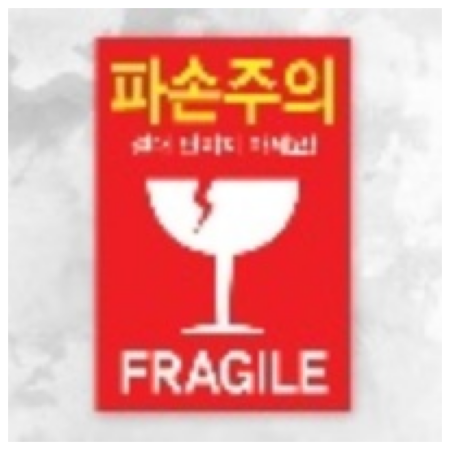

fragile


In [18]:
for_test = features[0]
for_test_img = for_test.reshape(200,200,3)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

#### validation

In [19]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold

In [20]:
# test index 겹치지 않음
# Therefore, in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold.

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)

In [21]:
skf.get_n_splits(features, labels)
print(skf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [22]:
#validation

train_index, test_index = next(skf.split(features, labels))
train_X, test_X = features[train_index], features[test_index]
train_y, test_y = labels[train_index], labels[test_index]

In [30]:
print(len(test_X))
print(len(test_X))

123
123


In [ ]:
val_img_list = []
for i in test_index:
    val_img_list.append(img_path[i])

In [ ]:
fragile_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/val/fragile'
handle_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/val/handle'
wet_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/val/wet'
up_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/val/up'

In [ ]:
import shutil
import os


for i in val_img_list:
    try:
        if 'fragile' in i:
            shutil.copy(i, fragile_dst)
        elif 'handle' in i:
            shutil.copy(i, handle_dst)
        elif 'wet' in i:
            shutil.copy(i, wet_dst)
        elif 'up' in i:
            shutil.copy(i, up_dst)
    except:
        print(i)

#### validation 제외

In [ ]:
test_index =test_index.tolist()

In [67]:
#test_index 확인
img_path[0]

'/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile/fragile_resized_88.jpg'

In [66]:
features[0]

array([238, 238, 238, ..., 240, 240, 240], dtype=uint8)

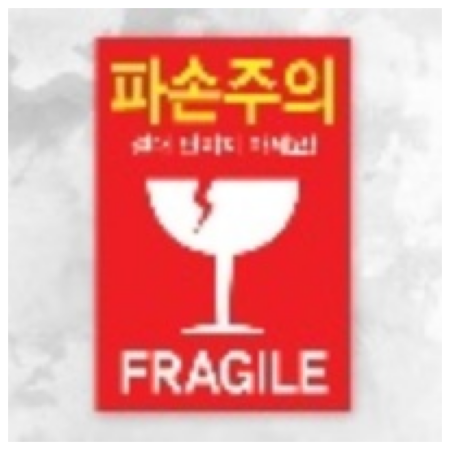

In [68]:
jpg = test_X[0].reshape(200,200,3)
show(jpg)

In [78]:
#새로운 파일명 만들기 --> feature되야함

new_img_path =[]
for num, i in enumerate(features):
    if num in test_index:
#         print(test_index[num])
        pass
    else:
        new_img_path.append(img_path[num])
        
print(len(new_img_path))

490


In [39]:
new_features=[]
for num, i in enumerate (features):
    if num in test_index:
        pass
    else:
        new_features.append(i)

In [41]:
new_label = []
for num, i in enumerate (labels):
    if num in test_index:
        pass
    else:
        new_label.append(i)

In [54]:
new_features = np.array(new_features)
new_label = np.array(new_label)

In [53]:
print(type(features))
print(type(new_features))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
skf.get_n_splits(new_features, new_label)
print(skf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [79]:
#train_test

train_index1, test_index1 = next(skf.split(new_features, new_label))
X_train, X_test = new_features[train_index1], new_features[test_index1]
y_train, y_test = new_label[train_index1], new_label[test_index1]

#### train, test

In [80]:
train_img_list = []
for i in train_index1:
    train_img_list.append(new_img_path[i])

    
test_img_list = []
for i in test_index1:
    test_img_list.append(new_img_path[i])

In [86]:
cd /Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train

/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train


In [82]:
/pwd

'/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test'

In [87]:
os.mkdir('fragile')
os.mkdir('handle')
os.mkdir('wet')
os.mkdir('up')

In [88]:
fragile_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/fragile'
handle_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/handle'
wet_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/wet'
up_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/up'

In [84]:
#test
fragile_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/fragile'
handle_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/handle'
wet_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/wet'
up_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/up'

In [89]:
import shutil
import os


for i in train_img_list:
    try:
        if 'fragile' in i:
            shutil.copy(i, fragile_dst)
        elif 'handle' in i:
            shutil.copy(i, handle_dst)
        elif 'wet' in i:
            shutil.copy(i, wet_dst)
        elif 'up' in i:
            shutil.copy(i, up_dst)
    except:
        print(i)

In [90]:
print(len(train_img_list))
print(len(val_img_list))
print(len(test_img_list))

392
123
98


In [93]:
len(features)==392+123+98

True

In [101]:
train_img_name = []
test_img_name = []
val_img_name = []

for i in train_img_list:
    i = i.split('/')[-1]
    train_img_name.append(i)
    
for i in test_img_list:
    i = i.split('/')[-1]
    test_img_name.append(i)
    
for i in val_img_list:
    i = i.split('/')[-1]
    val_img_name.append(i)

In [107]:
for i in test_img_name:
    if i in val_img_name:
        print(i)
    elif i in train_img_name:
        print(i)

.DS_Store
